# Data formats and open data
**Exercises for week 5B** in Digital Methods, University of Copenhagen

## 1. HTML

HTML is the markup language used by web pages. It's ubiquitous on the web; even when editing this notebook you are interacting with HTML (right click and hit "View Page Source" if you need proof). Here follows some exercises to get you comfortable with navigating HTML on web pages.

> **Ex. 1**: Right click inside the cell below and hit "Inspect". This should launch the "Inspector" tool in your browser, showing you where the element that renders the cell sits inside the DOM.
1. How deeply is it nested? Are there any sibling elements?
2. What happens when you update it? Change the text and see for yourself.
>
> *Hint: Most modern browsers (e.g. Firefox, Chrome, Brave) will let you hover elements in the DOM to show where they display on the web page.*

*HTML is a beautiful soup of hypertext!*

**ANS 1**

I find that there are 9 divs around it, so including the `body` and `html` tags, 
the cell is 11 levels deep! It has a four sibling divs at the same level.

**ANS 2**

The HTML automatically updates!

> **Ex. 2**: In the HTML code below:
1. What is typically the use of the `<p>`, `<h1>` and `<h2>` tags? Look them up, what are they for?
2. What are the attributes of the `div` element?
3. Create a text file that ends with ".html" and open it in a browser.

    <html>
    <body>

    <div width=200 height=100 id="main">
        <h1>This is the main title of the webpage</h1>
        <h2>This is a sub-heading</h2>
        <p>This is a paragraph of text.</p>
    </div>

    <h2>This is another sub-heading</h2>
    <p>This is a paragraph of text with some words in bold.</p>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1" width="493" height="340">
    <p>And that just above is an image.</p>

    </body>
    </html>


**ANS 1**

`<p>` tags are for declaring paragraphs of text. They are useful because they let
you define differen classes of text that you can style seperately. For web scraping
this is sometimes convenient as we can sort through paragraphs based on classes
if we know what class of paragraphs to look for.

**ANS 2**

The `div` object has attributes `width=100`, `height=100` and `id="main"`.

> **Ex. 3**: Using the `requests` module, download [this web page](https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1). Print the first 100 lines of the html string. How many lines are there in total?
>
> *Hint: use the `requests.get` method. To figure out how it works, execute `?requests.get` (after importing `requests`), this displays the module documentation.*

In [2]:
import requests as rq

# Get a response from the web server
response = rq.get('https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1')

# Render it as text
html = response.text

# Split it on lines and take the first 100
html = html.split("\n")

# Loop over the segments and print the first 100
for i in range(100):
    print(html[i])

<!DOCTYPE html><html lang="en"><head>
  <!-- Google Tag Manager -->
  <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-PWD5VZT');
  </script>
  <!-- End Google Tag Manager -->

  <meta charset="utf-8">
  <meta name="description" content="2200 København N &amp; Ejerlejlighed. Udforsk boligerne og få alle oplysninger om boligen, inden du køber. Se resultaterne på en liste her.">
  <meta name="keywords" content="">

  <title>2200 København N &amp; Ejerlejlighed - Boliga.dk</title>
  <base href="/">
  <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0">
  <link rel="icon" type="image/x-icon" href="favicon.ico">
  <link href="https://fonts.g

## 1.2 Scraping

*Scraping* means to parse HTML and collect the important pieces of information inside. *Crawling* is
another important contect, and the word refers to automatically sifting through pages of the web and scraping
information on each page. 90% of scraping and crawling work can be done using the two modules `requests` and
`BeautifulSoup`.

> **Ex. 4:** Load the toy example HTML with BeautifulSoup. Use the [documentation page](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for reference on how to do this.
1. Access the `h1` element inside the `div` and print out its content (which is "This is the main title of the webpage").
2. Get the value of the `src` attribute inside the `img` element.
3. Get the second subheading that contains "This is another sub-heading" and print out that content.
4. Get the `div` element by searching for its id.

**ANS**

In [3]:
from bs4 import BeautifulSoup

html = """
<html>
<body>

<div width=200 height=100 id="main">
    <h1>This is the main title of the webpage</h1>
    <h2>This is a sub-heading</h2>
    <p>This is a paragraph of text.</p>
</div>

<h2>This is another sub-heading</h2>
<p>This is a paragraph of text with some words in bold.</p>
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1" width="493" height="340">
<p>And that just above is an image.</p>

</body>
</html>"""

soup = BeautifulSoup(html, 'html.parser')

**ANS 1**

In [5]:
soup.div.h1.string

'This is the main title of the webpage'

**ANS 2**

In [6]:
soup.img['src']

'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.giphy.com%2Fmedia%2FkFgzrTt798d2w%2Fgiphy.gif&f=1&nofb=1'

**ANS 3**

In [9]:
soup.find_all('h2')[1].string

'This is another sub-heading'

**ANS 4**

In [10]:
soup.find(id='main')

<div height="100" id="main" width="200">
<h1>This is the main title of the webpage</h1>
<h2>This is a sub-heading</h2>
<p>This is a paragraph of text.</p>
</div>

> **Ex. 5** Load the HTML you downloaded in Ex. 3. For each post, extract price, square meter size and "Ejerudgift". You should create three different lists that contain each variable across posts.

**ANS**

In [113]:
import re

# Get html
html = rq.get('https://www.boliga.dk/resultat?propertyType=3&zipCodes=2200&page=1').text

# Create soup element
soup = BeautifulSoup(html)

In [112]:
prices = []
sizes = []
ejerudgifter = []
for post in soup.find_all('app-listing-information-lg'):
    
    # Ejerudgifter
    try:
        ejerudgift = re.findall(r'Ejerudgift: .+\xa0 kr\.', post.text)[0]
        ejerudgift = ejerudgift.replace('Ejerudgift: ', '')
        ejerudgift = ejerudgift.replace('\xa0 kr.', '')
        ejerudgift = ejerudgift.replace(".", '')
        ejerudgift = int(ejerudgift)
        ejerudgifter.append(ejerudgift)
    except IndexError: # If posts don't have this listed we consider them invalid
        continue
    
    # Price
    price = re.findall(r"\d+?\.?\d{3}\.\d{3}\xa0kr\.", post.text)[0]
    price = price.replace('\xa0kr.', '')
    price = price.replace(".", "")
    price = int(price)
    prices.append(price)
    
    # Size
    size = re.findall(r'Boligstørrelse \d+ m²', post.text)[0]
    size = size.replace('Boligstørrelse ', '')
    size = size.replace(' m²', '')
    size = int(size)
    sizes.append(size)

> **Ex. 6:** Make a scatter plot of square meter size vs. extracted price. Then make a new variable that 
measures price per square meter and scatter plot this against "Ejerudgift". Can you say anything about how
"Ejerudgift" influences square meter price?

**ANS**

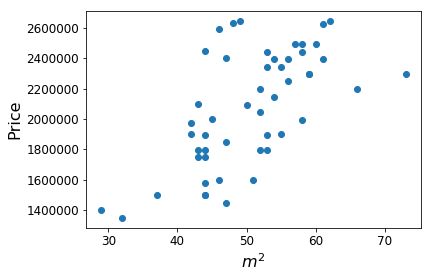

In [121]:
%matplotlib inline
import matplotlib.pylab as plt

# Scatter plot size vs price
plt.figure(figsize=(6, 4))
plt.scatter(sizes, prices)
plt.xlabel("$m^2$", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

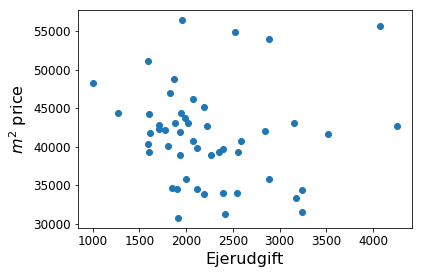

In [122]:
# Make new variable
price_per_square_meter = [
    prices[i] / sizes[i] for i in range(len(prices))
]

# Scatter plot price vs Ejerudgift
plt.figure(figsize=(6, 4))
plt.scatter(ejerudgifter, price_per_square_meter)
plt.xlabel("Ejerudgift", fontsize=16)
plt.ylabel("$m^2$ price", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Doesn't really seem to influence square meter price in this data, but I bet if we had more data we could see a trend!

> **Supercharge:** Crawl over pages of Boliga to collect this data for the entire borough of Nørrebro. Or all of Copenhagen!

**ANS**

Doing it for Copenhagen City

In [125]:
from tqdm import tqdm

prices = []
sizes = []
ejerudgifter = []

for i in tqdm(range(1, 41)):
    
    # Get html and create soup object
    html = rq.get('https://www.boliga.dk/resultat?propertyType=3&page=2&sort=zipCode-a&area=%d' % i).text
    soup = BeautifulSoup(html)

    for post in soup.find_all('app-listing-information-lg'):
        
        # Ejerudgifter
        try:
            ejerudgift = re.findall(r'Ejerudgift: .+\xa0 kr\.', post.text)[0]
            ejerudgift = ejerudgift.replace('Ejerudgift: ', '')
            ejerudgift = ejerudgift.replace('\xa0 kr.', '')
            ejerudgift = ejerudgift.replace(".", '')
            ejerudgift = int(ejerudgift)
        except IndexError: # If posts don't have this listed we consider them invalid
            continue

        # Price
        try:
            price = re.findall(r"\d+?\.?\d{3}\.\d{3}\xa0kr\.", post.text)[0]
            price = price.replace('\xa0kr.', '')
            price = price.replace(".", "")
            price = int(price)
        except IndexError: # If posts don't have this listed we consider them invalid
            continue

        # Size
        try:
            size = re.findall(r'Boligstørrelse \d+ m²', post.text)[0]
            size = size.replace('Boligstørrelse ', '')
            size = size.replace(' m²', '')
            size = int(size)
        except IndexError: # If posts don't have this listed we consider them invalid
            continue
            
        ejerudgifter.append(ejerudgift)
        prices.append(price)
        sizes.append(size)

100%|██████████| 40/40 [00:24<00:00,  1.63it/s]


Visualize

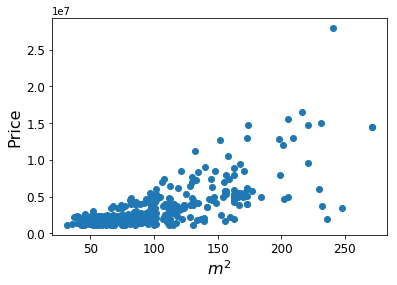

In [126]:
%matplotlib inline
import matplotlib.pylab as plt

# Scatter plot size vs price
plt.figure(figsize=(6, 4))
plt.scatter(sizes, prices)
plt.xlabel("$m^2$", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

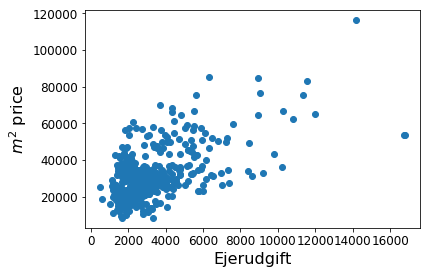

In [127]:
# Make new variable
price_per_square_meter = [
    prices[i] / sizes[i] for i in range(len(prices))
]

# Scatter plot price vs Ejerudgift
plt.figure(figsize=(6, 4))
plt.scatter(ejerudgifter, price_per_square_meter)
plt.xlabel("Ejerudgift", fontsize=16)
plt.ylabel("$m^2$ price", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()